In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


1. Loading the data file and converting it into a dataframe using the libraries Pandas and Numpy.

In [201]:
df = pd.read_csv(r"D:\Praxis\Term 2\AML\house.csv")

2. Checking initial and last 5 rows to understand the data.

In [202]:
df.head(5)

,name/id,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,A1,1,26.184098,1286.68,204.003817,22,67,96004.80456
1,A2,1,34.866901,1855.25,186.980360,8,30,92473.72257
2,A3,1,36.980709,692.09,111.224999,24,24,98112.51994
3,A4,1,17.445723,1399.49,237.998760,1,66,92118.32687
4,A5,1,52.587646,84.65,100.996399,20,3,98976.65318


In [203]:
df.tail(5)

,name/id,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
4040,N1,14,600.285032,499.92,84.714882,1,2,115050.42520
4041,N2,14,242.912020,1408.20,94.257176,2,34,99862.76873
4042,N3,14,381.986238,1600.48,175.757426,2,64,103316.06240
4043,Q1,17,750.971604,402.62,40.985933,1,80,118134.77120
4044,Q2,17,644.319019,229.89,-63.470240,1,76,115683.54950


Inference : The data has 4045 rows and 8 columns (Name/id, Bedroom Count, Net_sqm(Area), Centre Distance, Floor, Age(of Buyer) and price)

3. Checking the shape, size of the data and overview (information) about of the data.

In [204]:
df.shape

(4045, 8)

In [205]:
df.size

32360

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name/id          4045 non-null   object 
 1   bedroom_count    4045 non-null   int64  
 2   net_sqm          4045 non-null   float64
 3   center_distance  4045 non-null   float64
 4   metro_distance   4045 non-null   float64
 5   floor            4045 non-null   int64  
 6   age              4045 non-null   int64  
 7   price            4045 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 252.9+ KB


Inferences : 

.The data has 4045 rows and 8 columns and there are 32360 entries. This dataframe has adequete data to perform analysis on it. 

. The dataframe has features as bedroom_count, net_sqm, center_distance, metro_distance, floor, age and target label as price.

. The dataframe has datatypes like object, integer and decimals. Since the target label is continous, Regression method will be used for analysis.

. Since the name/id column is index here, hence it can dropped.

4. Dropping name/id

In [207]:
df = df.drop(columns = ["name/id"])

In [208]:
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.80456
1,1,34.866901,1855.25,186.980360,8,30,92473.72257


5. The columns net_sqm, metro_distance and price have mutilple decimal points, hence reducing it to just 2 place decimal.

In [209]:
df['net_sqm'] = df['net_sqm'].round(2)

In [210]:
df['metro_distance'] = df['metro_distance'].round(2)

In [211]:
df['price'] = df['price'].round(2)

In [212]:
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.18,1286.68,204.00,22,67,96004.80
1,1,34.87,1855.25,186.98,8,30,92473.72


6. Some of the entries are negative in metro_distance and henceorth, removing the negtive sign from metro_distance by converting to string and again to float.

In [213]:
df['metro_distance'] = df['metro_distance'].astype(str).str.replace('-', '').astype(float)

In [214]:
df['net_sqm'] = df['net_sqm'].astype(str).str.replace('-', '').astype(float)

In [215]:
df.head(3)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.18,1286.68,204.00,22,67,96004.80
1,1,34.87,1855.25,186.98,8,30,92473.72
2,1,36.98,692.09,111.22,24,24,98112.52


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


7. Understanding the distribution of the dataframe.

In [217]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.00000,4045.000000,4045.000000
mean,3.649691,111.658850,1007.115236,96.143439,9.55822,48.360198,95733.956497
std,2.465720,89.420988,578.706749,61.577223,7.70210,28.153029,3770.581750
min,1.000000,0.070000,10.060000,0.000000,1.00000,0.000000,84153.490000
25%,2.000000,50.170000,510.630000,45.040000,2.00000,24.000000,93199.040000
50%,3.000000,86.380000,1009.410000,89.820000,8.00000,48.000000,95474.250000
75%,5.000000,144.770000,1493.410000,140.510000,16.00000,72.000000,97863.620000
max,17.000000,750.970000,1999.840000,330.280000,24.00000,97.000000,118134.770000


Inferences:

. The mean of price is 95733 , median is 95474 and standard deviation is 3770 which is 4% of mean. This infers that the data is not having deviation from the mean and median is also conciding with mean so it is a normal distribution.

. The max price of house is 118134 and min is 84153

. The average for area is 111 sqm and people's age who are purchasing homes is 48.

# Exploratory Data Analysis

"Understanding the price distribution"

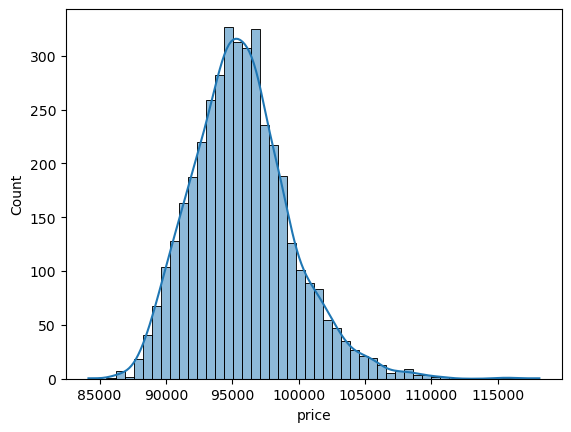

In [218]:
sns.histplot(x ="price", bins = 50, kde = True , data = df)
plt.show()

Inference : We find that the distribution is normal with some outliers with mean and median around 95000.

"Realtionship between bedroom count and price and people's preference."

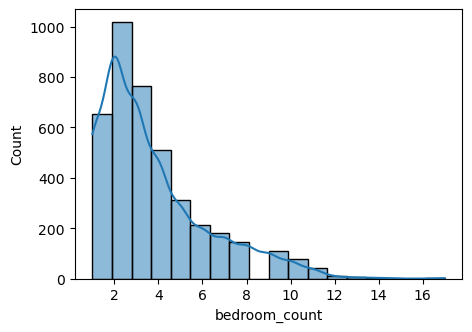

In [219]:
plt.figure(figsize=(5,3.5))
sns.histplot(x ="bedroom_count", bins = 18, kde = True , data = df)
plt.show()

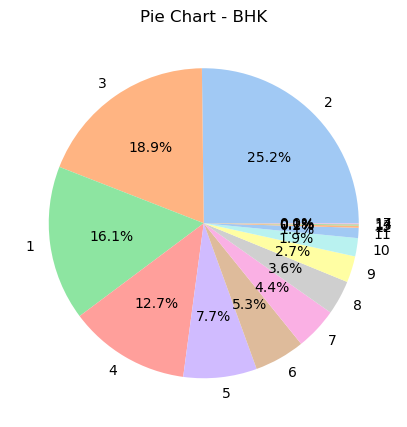

In [220]:
plt.figure(figsize=(5,22))
df['bedroom_count'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart - BHK')
plt.ylabel('')
plt.show()

<Axes: xlabel='bedroom_count', ylabel='price'>

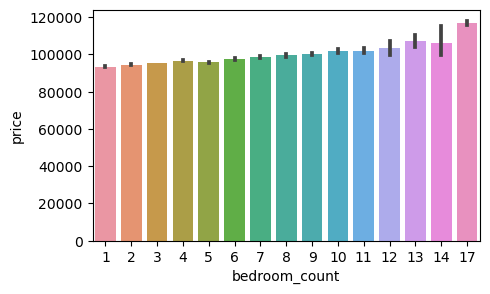

In [221]:
plt.figure(figsize=(5,3))
sns.barplot(x='bedroom_count', y = 'price', data = df)

Inference : People prefer 2 and 3 bedroom count more than anything else around 25% and 19%. Also, as the bedroom count increases, the price as well increases.

"Understanding relationship between Distances (from Centre and Metro) and their impact on price."

<Axes: xlabel='floor', ylabel='price'>

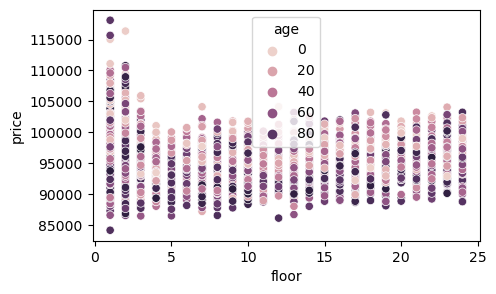

In [222]:
plt.figure(figsize=(5,3))
sns.scatterplot(x ='floor', y = 'price', hue = 'age',data = df)

Pairplot to visialize every possible graphs.

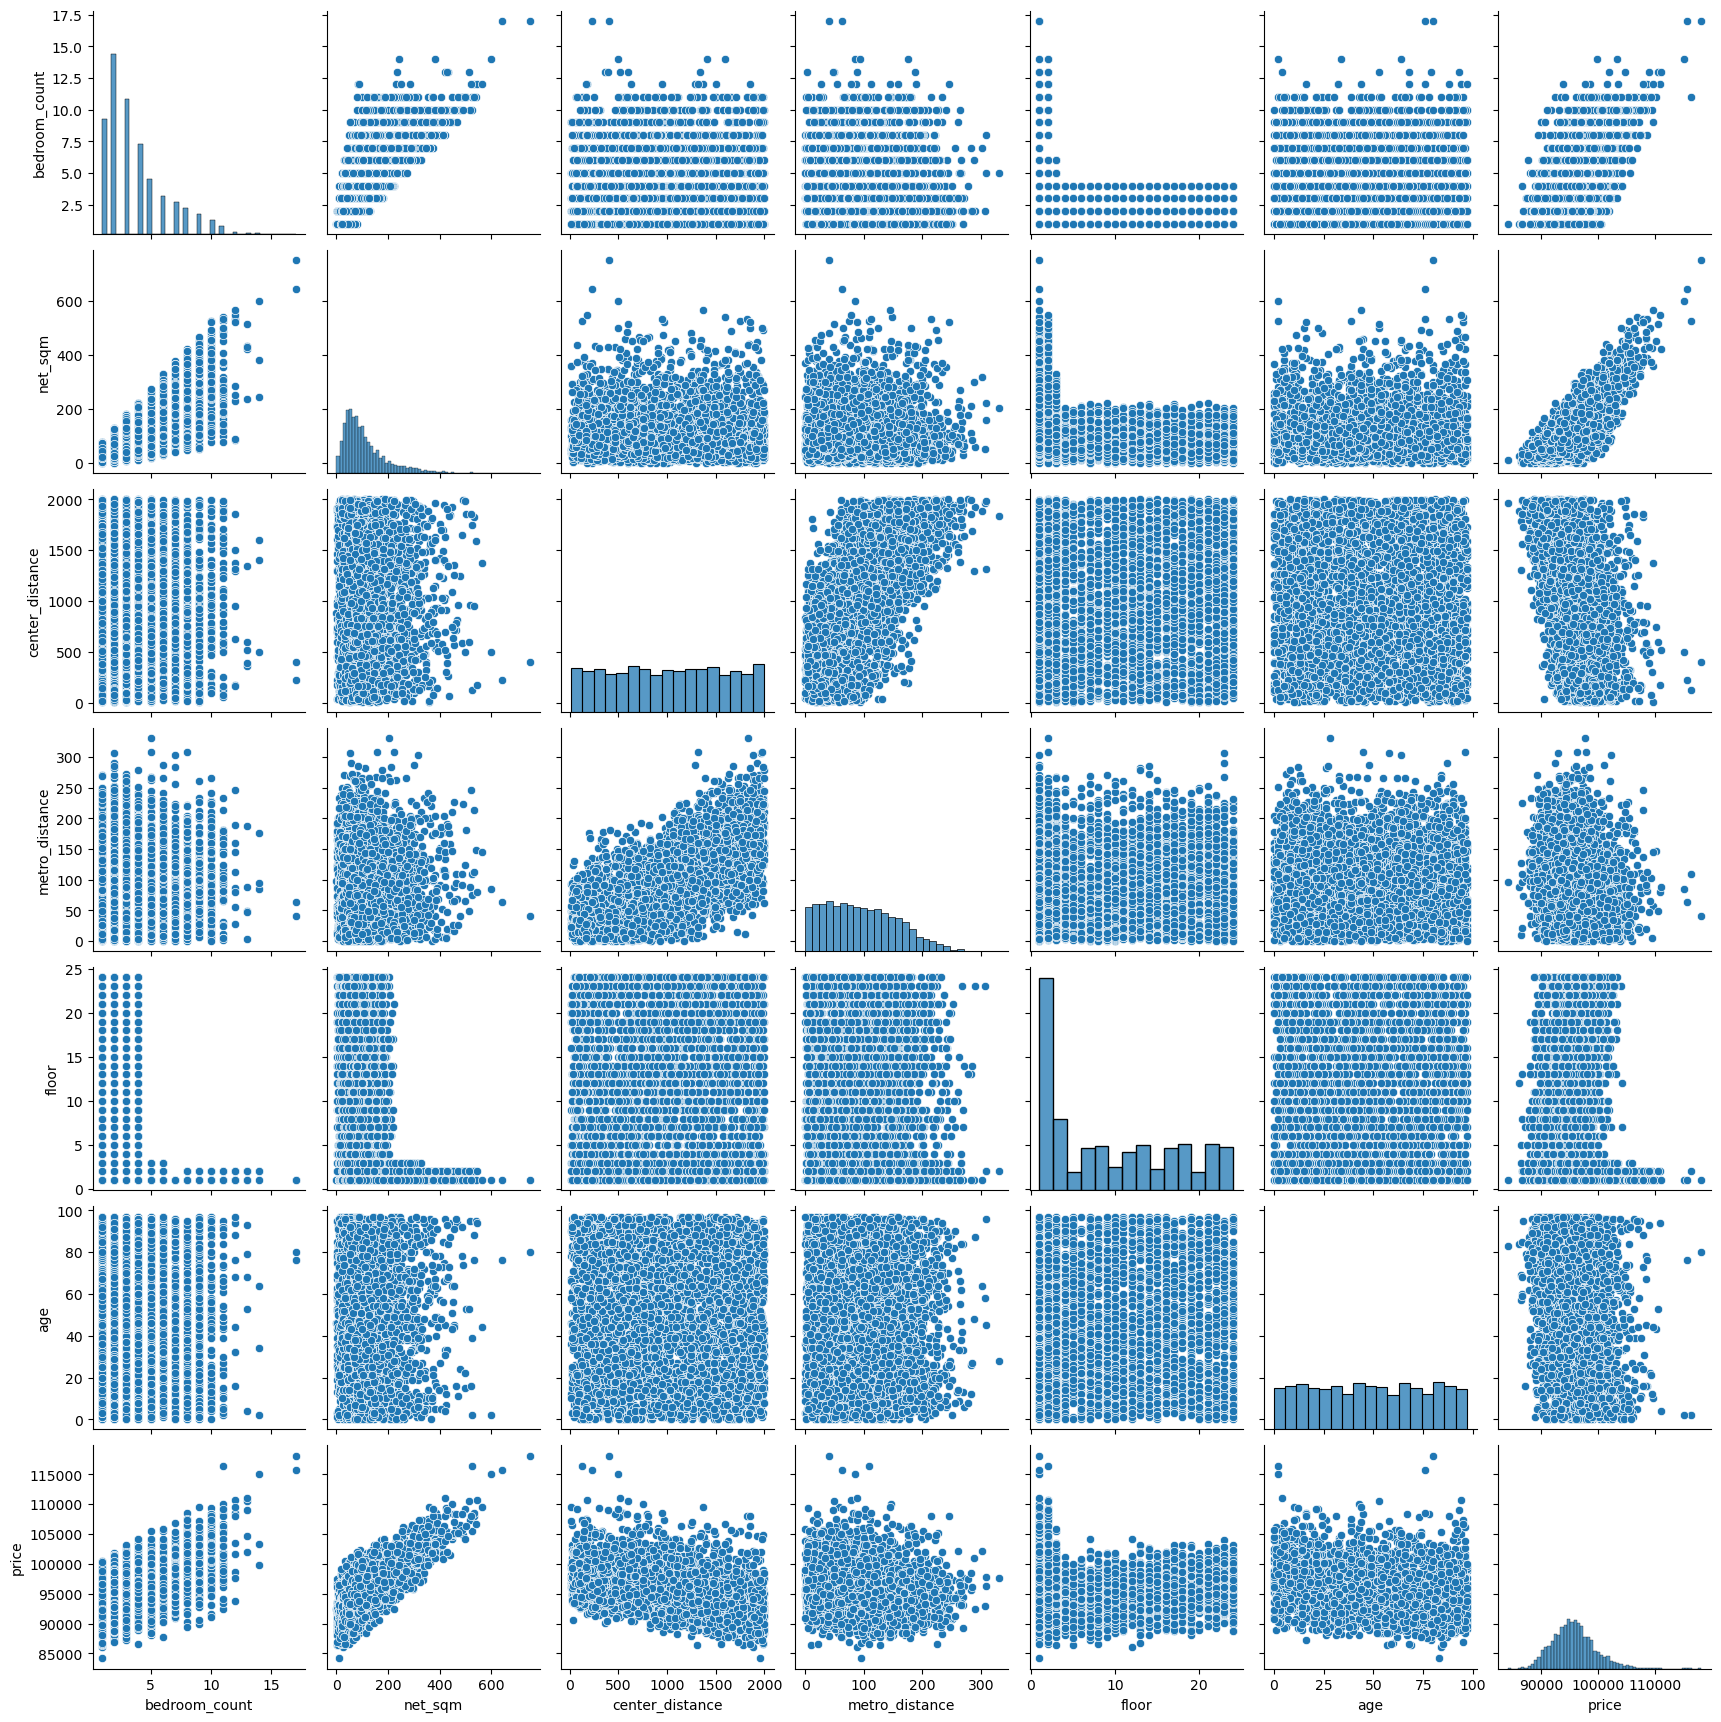

In [223]:
sns.pairplot(df)
plt.show()

. Metro connectivity

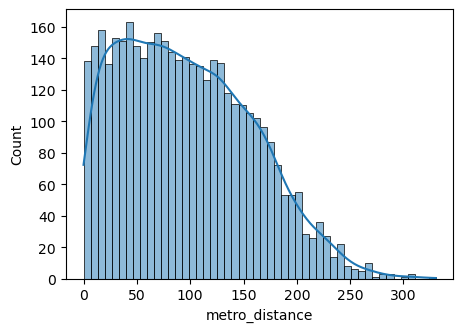

In [224]:
plt.figure(figsize=(5,3.5))
sns.histplot(x ="metro_distance", bins = 50, kde = True , data = df)
plt.show()

Inference : Most of the purchases are made on the basis of metro connectivity and distances from metro and it is the range of 0-50

<Axes: xlabel='metro_distance', ylabel='price'>

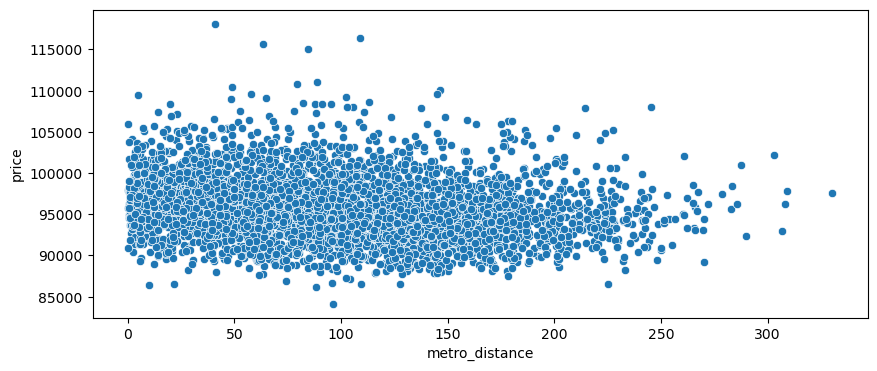

In [225]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'metro_distance', y ='price', data =df)

<Axes: xlabel='center_distance', ylabel='price'>

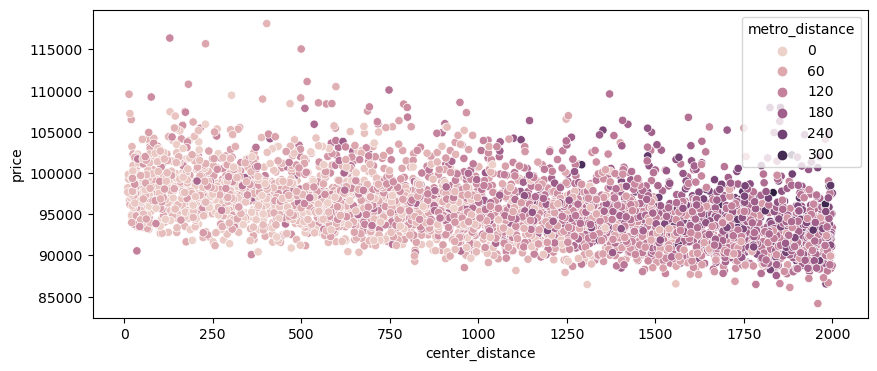

In [226]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'center_distance', y ='price', hue='metro_distance', data =df)

Inference : As the distance from the centre and metro increases, the prices decreases. So, this the key factor to be considered which predicting.

"Relationship between Floor and Age and price."

<Axes: xlabel='age', ylabel='floor'>

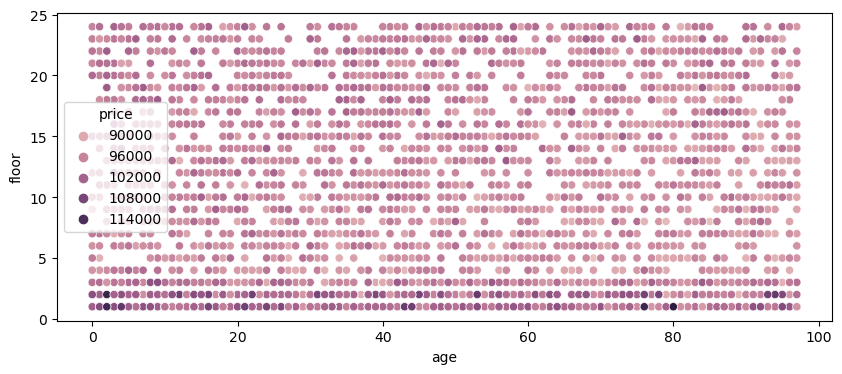

In [227]:
plt.figure(figsize=(10,4))
sns.scatterplot(y = 'floor', x ='age', hue ='price', data =df)

Inference : As the age of the purchaser increases, prefernces are more towards lower floors(0-5) and due to this the prices are highest here.

Oberservations : People prefer to stay close to centre or there has to vbe metro connectivity. Old age people doesn't prefer higher floors. Price changes have various factors like Bedroom count, net sqm, distance from centre and metro. Age specifically doesn't make any changes in prices but it influences the floor preferences.

8. Outliers treatment

In [228]:
df_num = df.select_dtypes('number')

<Axes: >

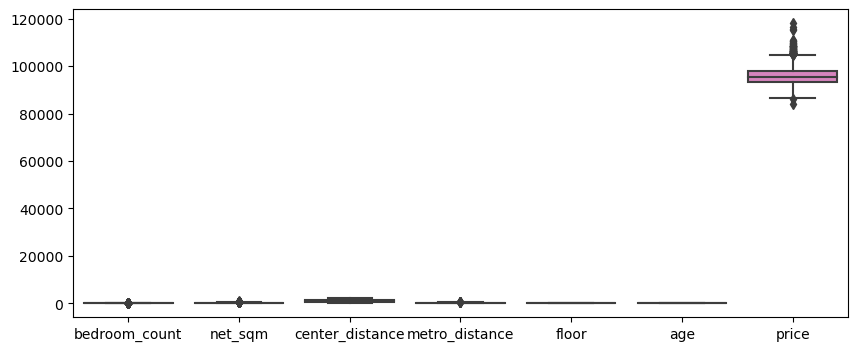

In [229]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df_num)

Inference : We find that there are outliers present in our dataset.

Removing outliers

In [230]:
Q1 = df_num.quantile(.25)
Q3 = df_num.quantile(.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [231]:
lower_bound

bedroom_count         -2.500
net_sqm              -91.730
center_distance     -963.540
metro_distance       -98.165
floor                -19.000
age                  -48.000
price              86202.170
dtype: float64

In [232]:
upper_bound

bedroom_count           9.500
net_sqm               286.670
center_distance      2967.580
metro_distance        283.715
floor                  37.000
age                   144.000
price              104860.490
dtype: float64

In [233]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

<Axes: xlabel='price'>

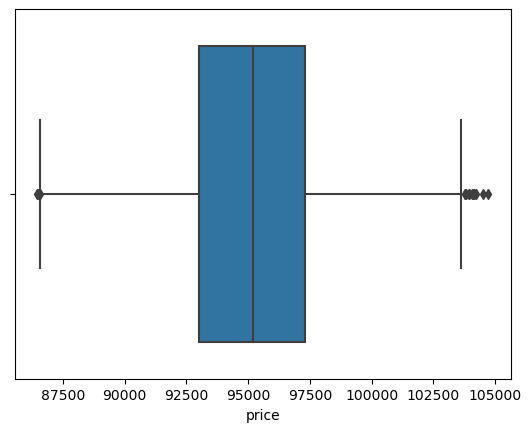

In [234]:
sns.boxplot(x = df['price'])

In [235]:
df_num = df.select_dtypes('number')

In [236]:
Q1 = df_num.quantile(.25)
Q3 = df_num.quantile(.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [237]:
lower_bound

bedroom_count         -1.00000
net_sqm              -72.37250
center_distance     -979.05625
metro_distance       -98.32375
floor                -18.00000
age                  -48.00000
price              86559.32250
dtype: float64

In [238]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

<Axes: xlabel='price'>

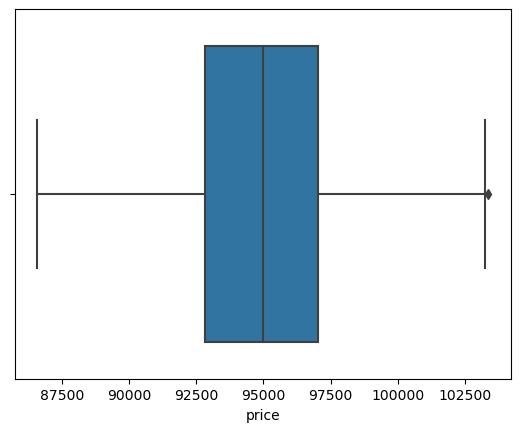

In [239]:
sns.boxplot(x = df['price'])

In [240]:
X = df.drop('price', axis=1)
y = df.price
X.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.18,1286.68,204.00,22,67
1,1,34.87,1855.25,186.98,8,30


In [241]:
X_cat = X.select_dtypes('object')
X_cat.head()

""
0
1
2
3
4


In [242]:
X_num = X.select_dtypes('number')
X_num.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.18,1286.68,204.00,22,67
1,1,34.87,1855.25,186.98,8,30
2,1,36.98,692.09,111.22,24,24
3,1,17.45,1399.49,238.00,1,66
4,1,52.59,84.65,101.00,20,3


In [243]:
### Standardizing numeric scales
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [244]:
type(X_num_scaled)

numpy.ndarray

In [245]:
## Converting to dataframe
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [246]:
X_num_scaled.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000
mean,0.319266,0.351748,0.501796,0.338795,0.425987,0.500774
std,0.259895,0.215956,0.291957,0.215581,0.327620,0.289467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.184641,0.249020,0.158820,0.086957,0.247423
50%,0.333333,0.311162,0.505855,0.316827,0.391304,0.494845
75%,0.500000,0.479701,0.749475,0.496362,0.695652,0.752577
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
X = X_num_scaled

In [248]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
dtype: int64
0
(3495, 6)
(3495,)


In [249]:
X.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000
mean,0.319266,0.351748,0.501796,0.338795,0.425987,0.500774
std,0.259895,0.215956,0.291957,0.215581,0.327620,0.289467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.184641,0.249020,0.158820,0.086957,0.247423
50%,0.333333,0.311162,0.505855,0.316827,0.391304,0.494845
75%,0.500000,0.479701,0.749475,0.496362,0.695652,0.752577
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [250]:
### Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2796, 6)
(699, 6)
(2796,)
(699,)


In [252]:
bs = pd.concat([X_train, y_train], axis=1).reset_index().drop(['index'], axis=1)
count=0
# a = ['']
abc = pd.DataFrame({})
for i in range(3):
    sample = bs.iloc[np.random.randint(0,7,5)].reset_index().drop(['index'], axis=1)
    model = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
    abc[f'sample{i}'] = model.predict(X_test)
abc

,sample0,sample1,sample2
0,99244.663333,99244.663333,99244.663333
1,97876.696667,97876.696667,97876.696667
2,95525.290000,95525.290000,95525.290000
3,92417.003333,92417.003333,92417.003333
4,93685.000000,93685.000000,93685.000000
...,...,...,...
694,95563.270000,95563.270000,95563.270000
695,96809.406667,96809.406667,96809.406667
696,97753.866667,97753.866667,97753.866667
697,92589.190000,92589.190000,92589.190000


In [253]:
bs

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,0.333333,0.633233,0.877851,0.388033,0.130435,0.453608,94535.81
1,0.000000,0.150876,0.245153,0.173707,0.608696,0.113402,94762.59
2,0.166667,0.151484,0.681070,0.476194,1.000000,0.711340,93392.50
3,0.166667,0.394022,0.467027,0.301921,0.739130,0.670103,95057.88
4,0.166667,0.479315,0.656118,0.713832,0.347826,0.670103,95376.08
...,...,...,...,...,...,...,...
2791,0.166667,0.196828,0.935636,0.454507,0.347826,0.814433,87774.53
2792,0.166667,0.213092,0.801516,0.758230,0.913043,0.154639,97228.74
2793,0.166667,0.171601,0.197424,0.184480,0.173913,0.000000,97293.82
2794,0.166667,0.316150,0.162264,0.085547,0.217391,0.762887,94317.41


# KNN Regressor

In [254]:
bias, var = [], []
K = []

for k in range(1, 50, 2):
    abc = pd.DataFrame({})
    
    for i in range(3):
        sample = bs.iloc[np.random.randint(0, 2500, 500)].reset_index().drop(['index'], axis=1)
        sample_x = sample.drop(['price'], axis=1)
        sample_y = sample['price']
        model = KNeighborsRegressor(n_neighbors=k).fit(sample_x, sample_y)
        abc[f'sample_pred{i}'] = model.predict(X_test)

    bs_test = pd.concat([X_test, abc], axis=1)
    bs_test['avg_pay'] = (bs_test['sample_pred0'] + bs_test['sample_pred1'] + bs_test['sample_pred2']) / len(abc.columns)
    y_test = y_test.reset_index().drop(['index'], axis=1)
    bs_test = pd.concat([bs_test, y_test], axis=1)

    Bias2 = (bs_test['price'] - bs_test['avg_pay'])**2
    bs_test['var'] = (bs_test['avg_pay'] - bs_test['sample_pred0'])**2 + (bs_test['avg_pay'] - bs_test['sample_pred1'])**2 + (bs_test['avg_pay'] - bs_test['sample_pred2'])**2

    bias.append(Bias2.mean())
    var.append(bs_test['var'].mean())
    K.append(k)

print("K values:", K)
print("Bias values:", bias)
print("Variance values:", var)


K values: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
Bias values: [2634653.5204728963, 2311706.762818357, 2278970.0731106196, 2313309.522494736, 2395990.510270058, 2332810.1641707662, 2466569.694562609, 2392881.69232485, 2495253.9932324835, 2574604.3294188706, 2658862.270229571, 2596533.4546596967, 2593979.011020148, 2729227.197501961, 2592995.516514463, 3024786.8863564106, 2912219.839006503, 3034411.6611991418, 2941508.4512703572, 3178601.9119367027, 3083966.997255736, 3154466.9237758005, 3092177.782862207, 3129668.5861645774, 3043804.432044329]
Variance values: [5022791.362021651, 1815349.8011282068, 1409177.8855993557, 860497.8024607959, 869756.5218862268, 673500.5917622593, 588324.6252053872, 469477.2488683037, 493274.2756503296, 454495.4493476741, 409957.6241782689, 322170.5456335688, 307396.5369149814, 380486.7873960979, 333021.46497348294, 234196.81844317398, 321709.64778197685, 305901.3119411466, 202633.00843578458, 239822.64

In [255]:
final_dict = pd.DataFrame({
    "K values": K,
    "Bias values": bias,
    "Variance values": var
})

print(final_dict)

    K values   Bias values  Variance values
0          1  2.634654e+06     5.022791e+06
1          3  2.311707e+06     1.815350e+06
2          5  2.278970e+06     1.409178e+06
3          7  2.313310e+06     8.604978e+05
4          9  2.395991e+06     8.697565e+05
5         11  2.332810e+06     6.735006e+05
6         13  2.466570e+06     5.883246e+05
7         15  2.392882e+06     4.694772e+05
8         17  2.495254e+06     4.932743e+05
9         19  2.574604e+06     4.544954e+05
10        21  2.658862e+06     4.099576e+05
11        23  2.596533e+06     3.221705e+05
12        25  2.593979e+06     3.073965e+05
13        27  2.729227e+06     3.804868e+05
14        29  2.592996e+06     3.330215e+05
15        31  3.024787e+06     2.341968e+05
16        33  2.912220e+06     3.217096e+05
17        35  3.034412e+06     3.059013e+05
18        37  2.941508e+06     2.026330e+05
19        39  3.178602e+06     2.398226e+05
20        41  3.083967e+06     2.612618e+05
21        43  3.154467e+06     1

In [256]:
var

[5022791.362021651,
 1815349.8011282068,
 1409177.8855993557,
 860497.8024607959,
 869756.5218862268,
 673500.5917622593,
 588324.6252053872,
 469477.2488683037,
 493274.2756503296,
 454495.4493476741,
 409957.6241782689,
 322170.5456335688,
 307396.5369149814,
 380486.7873960979,
 333021.46497348294,
 234196.81844317398,
 321709.64778197685,
 305901.3119411466,
 202633.00843578458,
 239822.64105625535,
 261261.8353169886,
 193074.4373916741,
 236105.8868231371,
 213859.15053476562,
 175586.45332443799]

In [257]:
bias

[2634653.5204728963,
 2311706.762818357,
 2278970.0731106196,
 2313309.522494736,
 2395990.510270058,
 2332810.1641707662,
 2466569.694562609,
 2392881.69232485,
 2495253.9932324835,
 2574604.3294188706,
 2658862.270229571,
 2596533.4546596967,
 2593979.011020148,
 2729227.197501961,
 2592995.516514463,
 3024786.8863564106,
 2912219.839006503,
 3034411.6611991418,
 2941508.4512703572,
 3178601.9119367027,
 3083966.997255736,
 3154466.9237758005,
 3092177.782862207,
 3129668.5861645774,
 3043804.432044329]

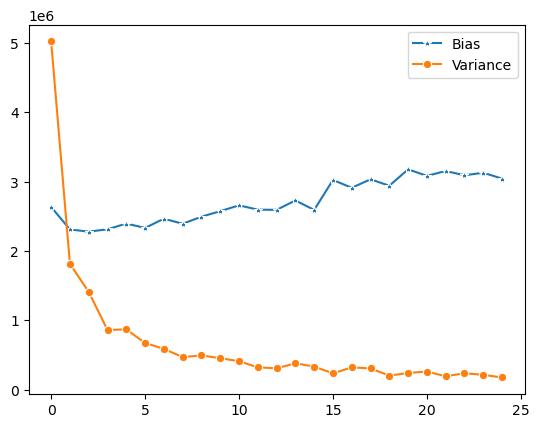

In [258]:
sns.lineplot(data = bias,marker='*',label='Bias')
sns.lineplot(data = var,marker='o',label='Variance')
plt.legend()
plt.show()

For the above model, BIAS-VARIANCE Tradeoff is at k(nearest neighbours) = 3.

Performance Evaluation :

In [304]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Assuming 'predictions' contains the predicted values from your KNN model
predictions = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1543.9142501377044
Mean Squared Error (MSE): 3712089.049811393
Root Mean Squared Error (RMSE): 1926.6782424191624


In [264]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.6640303778366297


Inference : The above mentioned KNN Regression model has R^2 has 65%, that means our model is able to explain 65% of the errors which is moderate number.

# Decision Tree Regression

In [293]:
bias, var = [], []
K = []

for k in range(1, 8, 1):
    abc = pd.DataFrame({})
    
    for i in range(3):
        sample = bs.iloc[np.random.randint(0, 2500, 500)].reset_index().drop(['index'], axis=1)
        sample_x = sample.drop(['price'], axis=1)
        sample_y = sample['price']
        model = DecisionTreeRegressor(max_depth = k).fit(sample_x, sample_y)
        abc[f'sample_pred{i}'] = model.predict(X_test)

    bs_test = pd.concat([X_test, abc], axis=1)
    bs_test['avg_pay'] = (bs_test['sample_pred0'] + bs_test['sample_pred1'] + bs_test['sample_pred2']) / len(abc.columns)
    y_test = y_test.reset_index().drop(['index'], axis=1)
    bs_test = pd.concat([bs_test, y_test], axis=1)

    Bias2 = (bs_test['price'] - bs_test['avg_pay'])**2
    bs_test['var'] = (bs_test['avg_pay'] - bs_test['sample_pred0'])**2 + (bs_test['avg_pay'] - bs_test['sample_pred1'])**2 + (bs_test['avg_pay'] - bs_test['sample_pred2'])**2

    bias.append(Bias2.mean())
    var.append(bs_test['var'].mean())
    K.append(k)

print("K values:", K)
print("Bias values:", bias)
print("Variance values:", var)


final_dict = pd.DataFrame({
    "K values": K,
    "Bias values": bias,
    "Variance values": var
})

print(final_dict)


K values: [1, 2, 3, 4, 5, 6, 7]
Bias values: [6089438.411918436, 4264761.694954129, 3851005.5474632247, 2983979.1247897577, 2807643.0140141766, 2524361.451943805, 2382024.520223079]
Variance values: [3068338.0081366557, 2484875.9134747623, 2204727.1463245116, 2798779.6403669342, 3656784.7694867942, 4300515.2432018705, 4428131.926358047]
   K values   Bias values  Variance values
0         1  6.089438e+06     3.068338e+06
1         2  4.264762e+06     2.484876e+06
2         3  3.851006e+06     2.204727e+06
3         4  2.983979e+06     2.798780e+06
4         5  2.807643e+06     3.656785e+06
5         6  2.524361e+06     4.300515e+06
6         7  2.382025e+06     4.428132e+06


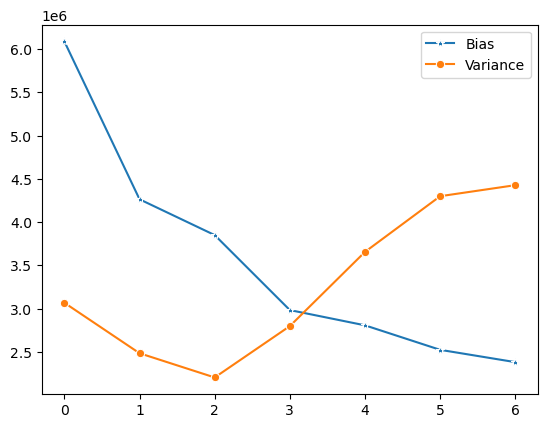

In [294]:
sns.lineplot(data = bias,marker='*',label='Bias')
sns.lineplot(data = var,marker='o',label='Variance')
plt.legend()
plt.show()

For the above model, BIAS-VARIANCE Tradeoff is at max depth = 3.

Performance Evaluation :

. Filling null values with Mean Imputation

In [299]:
bs_test['price'].fillna(bs_test['price'].mean(), inplace=True)
bs_test['avg_pay'].fillna(bs_test['avg_pay'].mean(), inplace=True)

In [300]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(bs_test['price'], bs_test['avg_pay'])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(bs_test['price'], bs_test['avg_pay'])
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) score
r2 = r2_score(bs_test['price'], bs_test['avg_pay'])
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 729.4261219272148
Mean Squared Error (MSE): 1351809.9395118367
R-squared (R2) Score: 0.7352053270417457


Inference : The above mentioned DecisionTree Regression model has R^2 has 74%, that means our model is able to explain 74% of the errors which is good score for a model.

# Random Forest Regressor

In [50]:
bias, var = [], []
K = []

for k in range(1, 50, 1):
    abc = pd.DataFrame({})
    
    for i in range(3):
        sample = bs.iloc[np.random.randint(0, 2500, 500)].reset_index().drop(['index'], axis=1)
        sample_x = sample.drop(['price'], axis=1)
        sample_y = sample['price']
        model = RandomForestRegressor(n_estimators=100, max_depth = k).fit(sample_x, sample_y)
        abc[f'sample_pred{i}'] = model.predict(X_test)

    bs_test = pd.concat([X_test, abc], axis=1)
    bs_test['avg_pay'] = (bs_test['sample_pred0'] + bs_test['sample_pred1'] + bs_test['sample_pred2']) / len(abc.columns)
    y_test = y_test.reset_index().drop(['index'], axis=1)
    bs_test = pd.concat([bs_test, y_test], axis=1)

    Bias2 = (bs_test['price'] - bs_test['avg_pay'])**2
    bs_test['var'] = (bs_test['avg_pay'] - bs_test['sample_pred0'])**2 + (bs_test['avg_pay'] - bs_test['sample_pred1'])**2 + (bs_test['avg_pay'] - bs_test['sample_pred2'])**2

    bias.append(Bias2.mean())
    var.append(bs_test['var'].mean())
    K.append(k)

print("K values:", K)
print("Bias values:", bias)
print("Variance values:", var)


final_dict = pd.DataFrame({
    "K values": K,
    "Bias values": bias,
    "Variance values": var
})

print(final_dict)


K values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Bias values: [5886658.16939235, 4091075.0459512975, 3411399.7201026846, 2702628.8140192768, 2397825.2221395695, 2248426.89955479, 2019351.5490348686, 2068145.6685698575, 1961993.1675304999, 1963705.7549250324, 2014667.621906742, 1897121.605214273, 1953531.6864348727, 1984701.0121508725, 1998572.2409477371, 1951461.3134580252, 1983134.9177883887, 2010052.1000225418, 1904526.4441549263, 1944756.083119473, 2009645.8890528555, 1986299.928324901, 1961335.9600201778, 1898474.5844962914, 1958066.4974225669, 1978376.5722225937, 1965651.7931290567, 1941314.757717022, 1943421.457857192, 1961833.9762632607, 1897904.7607267364, 2013363.5833131715, 1926363.1563752606, 1996931.5671436896, 1970952.7942741674, 1997293.77711813, 1947704.6928598823, 1928702.8986380827, 1886291.3533150516, 1965278.38915723, 20

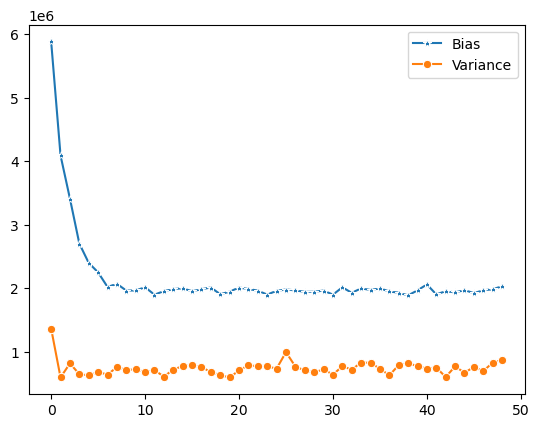

In [51]:
sns.lineplot(data = bias,marker='*',label='Bias')
sns.lineplot(data = var,marker='o',label='Variance')
plt.legend()
plt.show()

In [303]:
# Predictions are stored in 'bs_test['avg_pay']' and actual values in 'y_test'
predictions = bs_test['avg_pay']
actual_values = y_test['price']

# Align predictions and actual_values to have the same number of samples
min_samples = min(len(predictions), len(actual_values))
predictions = predictions[:min_samples]
actual_values = actual_values[:min_samples]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²) score
r_squared = r2_score(actual_values, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) score:", r_squared)


Mean Absolute Error (MAE): 2571.8834260332
Mean Squared Error (MSE): 10206419.04054334
Root Mean Squared Error (RMSE): 3194.74866625582
R-squared (R²) score: -0.13431446787007872


Inference : R2 is less here that means model is not appropiate.

# Gradient Boosting Regressor

In [52]:
bias, var = [], []
K = []

for k in range(1, 15, 1):
    abc = pd.DataFrame({})
    
    for i in range(3):
        sample = bs.iloc[np.random.randint(0, 2500, 500)].reset_index().drop(['index'], axis=1)
        sample_x = sample.drop(['price'], axis=1)
        sample_y = sample['price']
        model = GradientBoostingRegressor(n_estimators=100, learning_rate = k/10).fit(sample_x, sample_y)
        abc[f'sample_pred{i}'] = model.predict(X_test)

    bs_test = pd.concat([X_test, abc], axis=1)
    bs_test['avg_pay'] = (bs_test['sample_pred0'] + bs_test['sample_pred1'] + bs_test['sample_pred2']) / len(abc.columns)
    y_test = y_test.reset_index().drop(['index'], axis=1)
    bs_test = pd.concat([bs_test, y_test], axis=1)

    Bias2 = (bs_test['price'] - bs_test['avg_pay'])**2
    bs_test['var'] = (bs_test['avg_pay'] - bs_test['sample_pred0'])**2 + (bs_test['avg_pay'] - bs_test['sample_pred1'])**2 + (bs_test['avg_pay'] - bs_test['sample_pred2'])**2

    bias.append(Bias2.mean())
    var.append(bs_test['var'].mean())
    K.append(k/10)

print("K values:", K)
print("Bias values:", bias)
print("Variance values:", var)


final_dict = pd.DataFrame({
    "K values": K,
    "Bias values": bias,
    "Variance values": var
})

print(final_dict)


K values: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
Bias values: [1761952.2294440256, 1843352.9917096922, 1784095.2619182726, 1772769.8516059911, 1949562.1064486592, 1922252.5663702944, 2133277.8447668003, 2068441.8095961881, 2287535.057237751, 2655645.944170719, 2613223.5393157573, 2847707.8535942934, 2672330.2700795233, 3139095.8253337787]
Variance values: [736454.37027203, 997864.3429979868, 1256868.0319214107, 1589810.1322221514, 1970594.2062024681, 2280500.975561788, 2849813.8144779, 3424698.4949979153, 3855516.5856796294, 5875965.339704913, 6135558.538105553, 7513323.893672054, 8110336.2734676385, 10122502.86861399]
    K values   Bias values  Variance values
0        0.1  1.761952e+06     7.364544e+05
1        0.2  1.843353e+06     9.978643e+05
2        0.3  1.784095e+06     1.256868e+06
3        0.4  1.772770e+06     1.589810e+06
4        0.5  1.949562e+06     1.970594e+06
5        0.6  1.922253e+06     2.280501e+06
6        0.7  2.133278e+06     2.

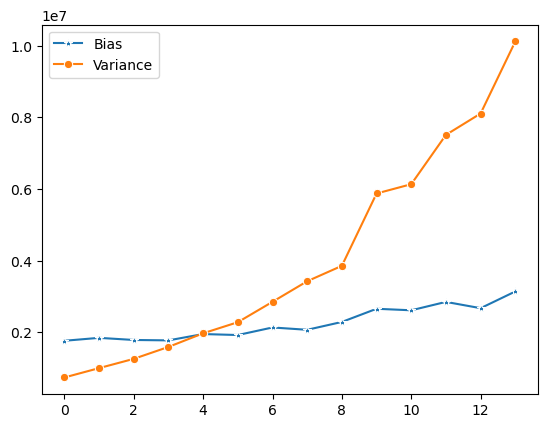

In [53]:
sns.lineplot(data = bias,marker='*',label='Bias')
sns.lineplot(data = var,marker='o',label='Variance')
plt.legend()
plt.show()

In [306]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# ... (previous code for bias and variance calculation)

# Initialize lists to store evaluation metrics
mae_values, mse_values, rmse_values, r2_values = [], [], [], []

for k in K:
    # Assuming bs_test['avg_pay'] contains the average predictions for the current value of k
    mae = mean_absolute_error(bs_test['price'], bs_test['avg_pay'])
    mse = mean_squared_error(bs_test['price'], bs_test['avg_pay'])
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE
    r2 = r2_score(bs_test['price'], bs_test['avg_pay'])
    
    # Append metrics to respective lists
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(r2)

# Add evaluation metrics to final_dict
final_dict['MAE'] = mae_values
final_dict['MSE'] = mse_values
final_dict['RMSE'] = rmse_values
final_dict['R-squared'] = r2_values

print(final_dict)


   K values   Bias values  Variance values         MAE           MSE  \
0         1  6.089438e+06     3.068338e+06  729.426122  1.351810e+06   
1         2  4.264762e+06     2.484876e+06  729.426122  1.351810e+06   
2         3  3.851006e+06     2.204727e+06  729.426122  1.351810e+06   
3         4  2.983979e+06     2.798780e+06  729.426122  1.351810e+06   
4         5  2.807643e+06     3.656785e+06  729.426122  1.351810e+06   
5         6  2.524361e+06     4.300515e+06  729.426122  1.351810e+06   
6         7  2.382025e+06     4.428132e+06  729.426122  1.351810e+06   

          RMSE  R-squared  
0  1162.673617   0.735205  
1  1162.673617   0.735205  
2  1162.673617   0.735205  
3  1162.673617   0.735205  
4  1162.673617   0.735205  
5  1162.673617   0.735205  
6  1162.673617   0.735205  


Inference : The above mentioned Gradient Boosting Regression model has R^2 has 74%, that means our model is able to explain 74% of the errors which is good score for a model.

# Linear Regression

In [310]:
bias = []
variance = []
for i in range(1,len(X.columns)+1):
    lr_Pred = pd.DataFrame()
    for j in range(1,10):
        lr_X_train = X_train.iloc[:,:i].sample(frac=0.9)
        lr_y_train = y_train.loc[lr_X_train.index]
        lr = LinearRegression()
        lr_model = lr.fit(lr_X_train,lr_y_train)
        pred = lr_model.predict(X_test.iloc[:,:i]).flatten()
        lr_Pred[f'y_hat_{j}'] = pred
    sum_ = np.zeros(len(lr_Pred))
    count_ = 0
    for k in lr_Pred.columns:
        sum_ = sum_ + lr_Pred[k]
        count_ += 1
    lr_Pred['Exp_y_hat'] = sum_/count_
    lr_Pred.index=X_test.index  
    lr_Pred['y'] = y_test     
    lr_Pred['variance']=0
    lr_Pred['bias']=(lr_Pred['Exp_y_hat']-lr_Pred['y'])**2/j-1
    for l in range(len(lr_Pred)):
        lr_Pred['variance'].iloc[l]=lr_Pred.iloc[l,:j-1].var(ddof=0)
    variance.append(lr_Pred['variance'].mean())
    bias.append(lr_Pred['bias'].mean())

C:\Users\admin\AppData\Local\Temp\ipykernel_17048\2932402923.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_Pred['variance'].iloc[l]=lr_Pred.iloc[l,:j-1].var(ddof=0)
C:\Users\admin\AppData\Local\Temp\ipykernel_17048\2932402923.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_Pred['variance'].iloc[l]=lr_Pred.iloc[l,:j-1].var(ddof=0)
C:\Users\admin\AppData\Local\Temp\ipykernel_17048\2932402923.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

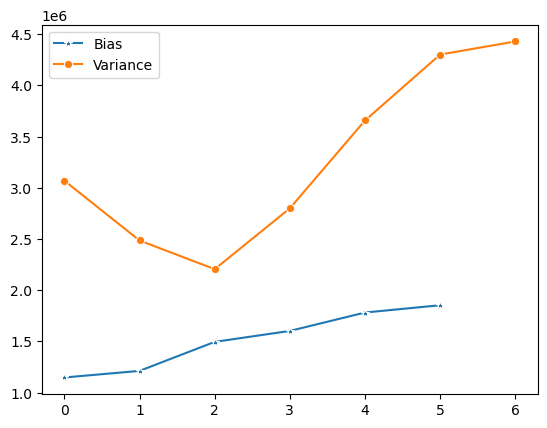

In [311]:
sns.lineplot(data = bias,marker='*',label='Bias')
sns.lineplot(data = var,marker='o',label='Variance')
plt.legend()
plt.show()

In [314]:
# Fills NaN values with the mean of 'y'
lr_Pred['y'].fillna(lr_Pred['y'].mean(), inplace=True)  
# Fills NaN values with the mean of 'Exp_y_hat'
lr_Pred['Exp_y_hat'].fillna(lr_Pred['Exp_y_hat'].mean(), inplace=True) 

In [315]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming lr_Pred['Exp_y_hat'] is your predicted values and lr_Pred['y'] is your true values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(lr_Pred['y'], lr_Pred['Exp_y_hat'])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(lr_Pred['y'], lr_Pred['Exp_y_hat'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(lr_Pred['y'], lr_Pred['Exp_y_hat'])

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 2527.9861497026423
Mean Squared Error (MSE): 9960999.552052395
Root Mean Squared Error (RMSE): 3156.1051237327943
R-squared (R2) Score: -3.2447428283893105


Inference : R2 is not appropiate so the model is not appropiate

# Summary

. Best one is Decision Tree and Gradient Boosting on this dataset

. Linear Regression and Random Forest are not suggested for this dataset as the R2 is too low.

. Bias-Variance tradeoffs have been explained above.